In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [511]:
df = pd.read_csv("HR Data.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## DATA PROCESSING 

In [512]:
# checking for null values
# No null value found in any column 
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [513]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [514]:
# drop unnecessary columns 
df.drop(["BusinessTravel", "DistanceFromHome", "EmployeeCount", "EmployeeNumber","StockOptionLevel","Over18","EnvironmentSatisfaction"], axis=1, inplace=True)



In [515]:
df["Total_Experience"] = df["YearsAtCompany"] + df["YearsInCurrentRole"] + df["YearsSinceLastPromotion"] + df["YearsWithCurrManager"]
df.head()

,Age,Attrition,DailyRate,Department,Education,EducationField,Gender,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Total_Experience
0,41,Yes,1102,Sales,2,Life Sciences,Female,94,3,2,...,1,80,8,0,1,6,4,0,5,15
1,49,No,279,Research & Development,1,Life Sciences,Male,61,2,2,...,4,80,10,3,3,10,7,1,7,25
2,37,Yes,1373,Research & Development,2,Other,Male,92,2,1,...,2,80,7,3,3,0,0,0,0,0
3,33,No,1392,Research & Development,4,Life Sciences,Female,56,3,1,...,3,80,8,3,3,8,7,3,0,18
4,27,No,591,Research & Development,1,Medical,Male,40,3,1,...,4,80,6,3,3,2,2,2,2,8


In [516]:
# droping hourlyrate as daily rate is given if we heir someone on daily basis it "daily rate" can play a significance role in that.
# we are droping standardhours as it a uniform column. we can keep it in our mind.
df.drop(["YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager","HourlyRate","StandardHours","PercentSalaryHike","RelationshipSatisfaction"], axis=1, inplace=True)
df.head()

,Age,Attrition,DailyRate,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Total_Experience
0,41,Yes,1102,Sales,2,Life Sciences,Female,3,2,Sales Executive,...,Single,5993,19479,8,Yes,3,8,0,1,15
1,49,No,279,Research & Development,1,Life Sciences,Male,2,2,Research Scientist,...,Married,5130,24907,1,No,4,10,3,3,25
2,37,Yes,1373,Research & Development,2,Other,Male,2,1,Laboratory Technician,...,Single,2090,2396,6,Yes,3,7,3,3,0
3,33,No,1392,Research & Development,4,Life Sciences,Female,3,1,Research Scientist,...,Married,2909,23159,1,Yes,3,8,3,3,18
4,27,No,591,Research & Development,1,Medical,Male,3,1,Laboratory Technician,...,Married,3468,16632,9,No,3,6,3,3,8


In [517]:
if (df["Age"] < 18).any():
    print("There are minors in the dataset.")
else:
    print("All individuals are 18 or older.")

All individuals are 18 or older.


In [518]:
#this shows that there is no need to meansion "over 18" explicitly


In [519]:
df.head()

,Age,Attrition,DailyRate,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,...,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Total_Experience
0,41,Yes,1102,Sales,2,Life Sciences,Female,3,2,Sales Executive,...,Single,5993,19479,8,Yes,3,8,0,1,15
1,49,No,279,Research & Development,1,Life Sciences,Male,2,2,Research Scientist,...,Married,5130,24907,1,No,4,10,3,3,25
2,37,Yes,1373,Research & Development,2,Other,Male,2,1,Laboratory Technician,...,Single,2090,2396,6,Yes,3,7,3,3,0
3,33,No,1392,Research & Development,4,Life Sciences,Female,3,1,Research Scientist,...,Married,2909,23159,1,Yes,3,8,3,3,18
4,27,No,591,Research & Development,1,Medical,Male,3,1,Laboratory Technician,...,Married,3468,16632,9,No,3,6,3,3,8


In [547]:
#  In df["Attrition"] we can replace "Yes" = 1  and "No" = 0 
#  similary we can do this for df["Department"] (['Sales' = 0 , 'Research & Development'= 1 , 'Human Resources' = 2], dtype=object)
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [549]:
df["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [521]:
if (df["MaritalStatus"] == "Single").any():
    print("There are single in the dataset.")
else:
    print("All individuals are Married.")

There are single in the dataset.


In [522]:
df[df["MaritalStatus"] == "Single"].shape[0]

470

# Exporatory data analysis (E.D.A) AND DATA VISUALIZATION

In [523]:
df.describe()

,Age,DailyRate,Education,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Total_Experience
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,2.912925,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,3.153741,11.279592,2.799320,2.761224,17.548299
std,9.135373,403.509100,1.024165,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,0.360824,7.780782,1.289271,0.706476,14.439896
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,3.000000,6.000000,2.000000,2.000000,8.000000
50%,36.000000,802.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,3.000000,10.000000,3.000000,3.000000,12.000000
75%,43.000000,1157.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,3.000000,15.000000,3.000000,3.000000,26.000000
max,60.000000,1499.000000,5.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,4.000000,40.000000,6.000000,4.000000,71.000000


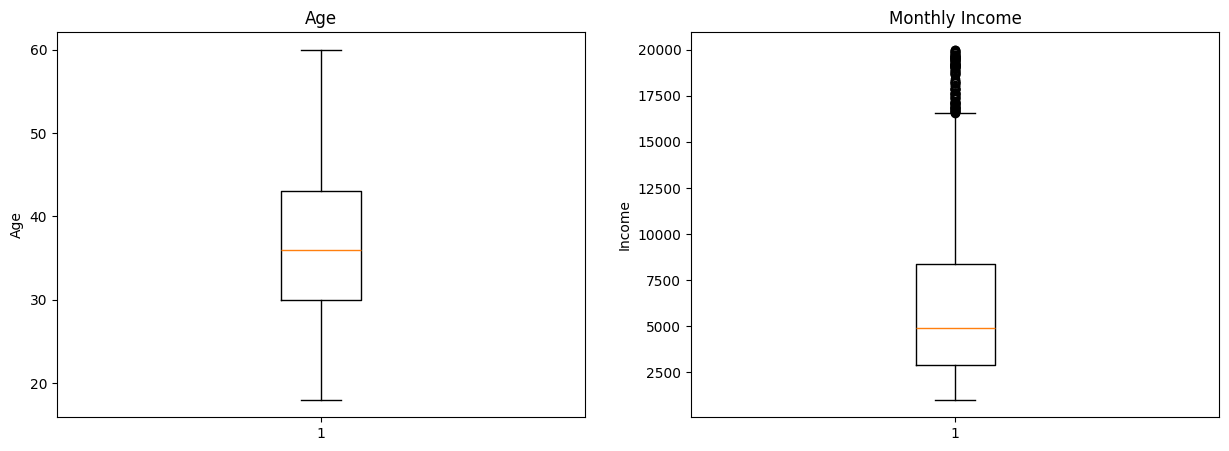

In [524]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].boxplot(df["Age"])
axes[0].set_ylabel('Age')
axes[0].set_title('Age')

# Plotting the 'MonthlyIncome' column in the second subplot
axes[1].boxplot(df["MonthlyIncome"])
axes[1].set_ylabel('Income')
axes[1].set_title('Monthly Income')

# Display the plot
plt.show()




In [525]:
# there is no outlier in Age column but there are outliers in monthly income column.
df["MonthlyIncome"].min()

np.int64(1009)

In [526]:
df["MonthlyIncome"].max()

np.int64(19999)

np.float64(1.3698166808390662)

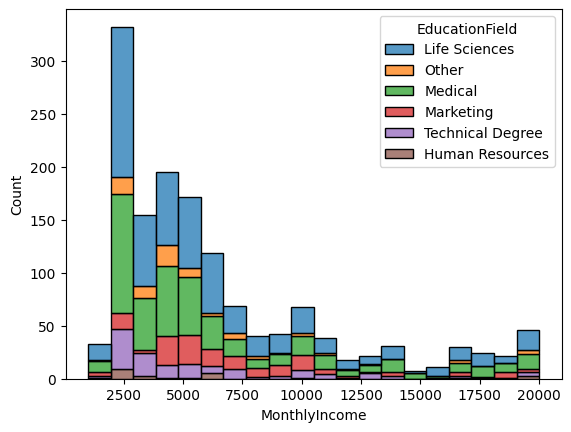

In [527]:
#this shows that data is right skewed 
# we can also visualize monthly income on the basis on educational field 

sns.histplot(df, x="MonthlyIncome", hue = "EducationField",multiple="stack")
df["MonthlyIncome"].skew()

<Axes: xlabel='JobSatisfaction', ylabel='count'>

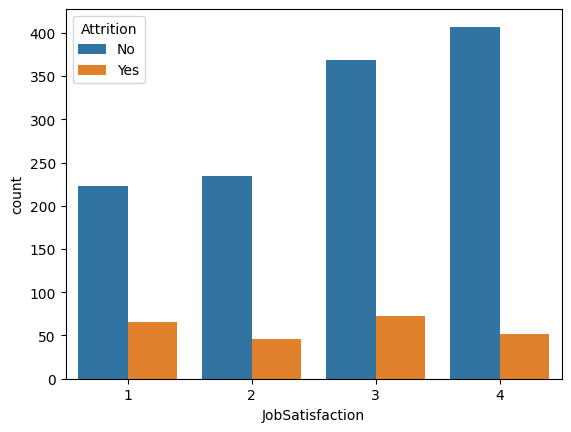

In [528]:
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition")

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    1470 non-null   int64 
 1   Attrition              1470 non-null   object
 2   DailyRate              1470 non-null   int64 
 3   Department             1470 non-null   object
 4   Education              1470 non-null   int64 
 5   EducationField         1470 non-null   object
 6   Gender                 1470 non-null   object
 7   JobInvolvement         1470 non-null   int64 
 8   JobLevel               1470 non-null   int64 
 9   JobRole                1470 non-null   object
 10  JobSatisfaction        1470 non-null   int64 
 11  MaritalStatus          1470 non-null   object
 12  MonthlyIncome          1470 non-null   int64 
 13  MonthlyRate            1470 non-null   int64 
 14  NumCompaniesWorked     1470 non-null   int64 
 15  OverTime             

In [533]:
numerical_df = df.select_dtypes(include=[int])


In [536]:
numerical_df.head()

,Age,DailyRate,Education,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Total_Experience
0,41,1102,2,3,2,4,5993,19479,8,3,8,0,1,15
1,49,279,1,2,2,2,5130,24907,1,4,10,3,3,25
2,37,1373,2,2,1,3,2090,2396,6,3,7,3,3,0
3,33,1392,4,3,1,3,2909,23159,1,3,8,3,3,18
4,27,591,1,3,1,2,3468,16632,9,3,6,3,3,8


In [538]:
correlation_matrix = numerical_df.corr()
correlation_matrix


,Age,DailyRate,Education,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Total_Experience
Age,1.000000,0.010661,0.208034,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.001904,0.680381,-0.019621,-0.021490,0.283755
DailyRate,0.010661,1.000000,-0.016806,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.000473,0.014515,0.002453,-0.037848,-0.025886
Education,0.208034,-0.016806,1.000000,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.024539,0.148280,-0.025100,0.009819,0.073611
JobInvolvement,0.029820,0.046135,0.042438,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.029071,-0.005533,-0.015338,-0.014617,-0.005852
JobLevel,0.509604,0.002966,0.101589,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.021222,0.782208,-0.018191,0.037818,0.496301
JobSatisfaction,-0.004892,0.030571,-0.011296,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.002297,-0.020185,-0.005779,-0.019459,-0.013090
MonthlyIncome,0.497855,0.007707,0.094961,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.017120,0.772893,-0.021736,0.030683,0.471494
MonthlyRate,0.028051,-0.032182,-0.026084,-0.016322,0.039563,0.000644,0.034814,1.000000,0.017521,-0.009811,0.026442,0.001467,0.007963,-0.021982
NumCompaniesWorked,0.299635,0.038153,0.126317,0.015012,0.142501,-0.055699,0.149515,0.017521,1.000000,-0.014095,0.237639,-0.066054,-0.008366,-0.108490
PerformanceRating,0.001904,0.000473,-0.024539,-0.029071,-0.021222,0.002297,-0.017120,-0.009811,-0.014095,1.000000,0.006744,-0.015579,0.002572,0.019870


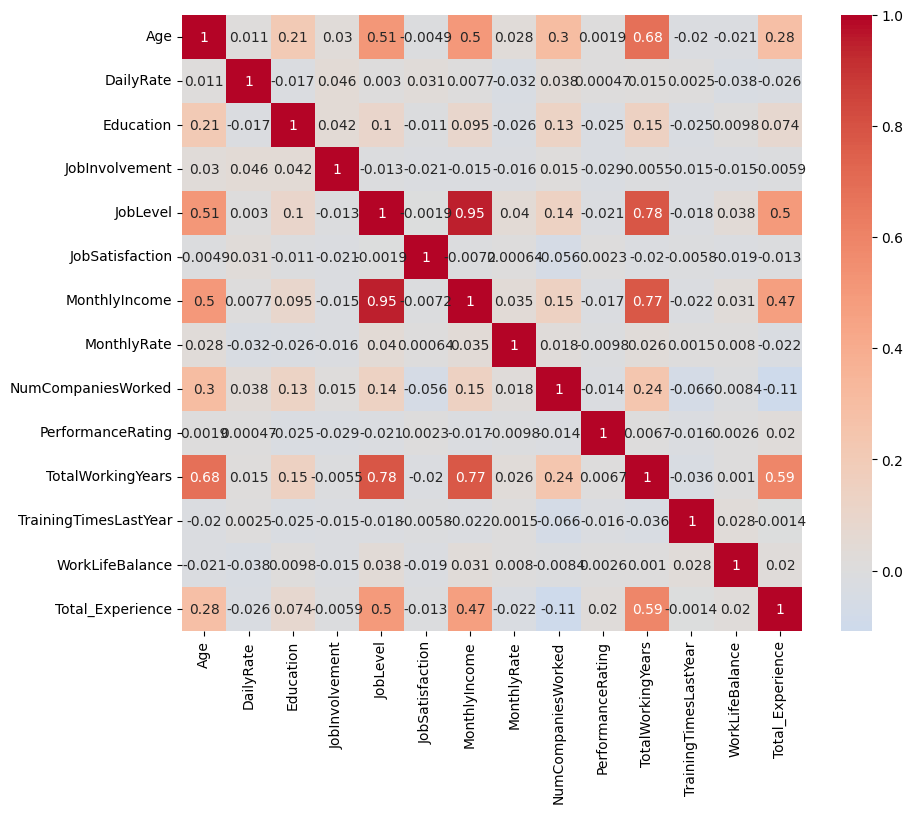

In [539]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()